# Algoritmo Metrópolis Hastings
Basado en: https://www.youtube.com/watch?v=aiPsbPxT29M

# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Realizando un muestreo de la normal:
$$
N(\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [2]:
# Definimos la función de densidad
def f(x, mu, std):
    
    primera_parte = 1 / ( np.sqrt(2*np.pi* np.power(std,2)) )
    exponente = np.power( x - mu ,2) / (2*np.power(std,2))
    total = primera_parte * np.exp(-exponente)
    
    return total

Para la primera implementación, trabajaremos con
- $\mu = 0.2$ 
- $\sigma = 0.1$

In [6]:
mu = 0.2
sigma = 0.1

Para la propuesta, asumimos nuestro salto (h) como: $\delta = 0.5$ y vamos a calcular la razón de aceptación 

In [54]:
delta = 0.1

In [55]:
# Número de muestras
n = 50000

# Generamos un arreglo que almacenará nuestra cadena
x = np.zeros(n)

# Número en el que vamos empezar, podría no ser 0
x[0] = 0

# Cantidad de veces que aceptamos
acept = 0

# Recorremos en la cantidad n
for i in range(n-1):
    
    # Corresponde al número donde estamos situados, más un número aleatorio
    # entre [-delta,delta]
    y = x[i] + np.random.uniform(-delta,delta)
    
    # Generamos un numero aleatorio U-[0,1]
    u = np.random.rand()
    
    # Vemos 
    if u < min(1,f(y,mu,sigma)/f(x[i],mu,sigma)):
        # Aceptamos y cambiamos de posición
        x[i+1]=y
        # Incrementamos contador
        acept+=1
    # En caso de no cumplir con la condición
    else:
        # Mantenemos nuestra posición
        x[i+1] = x[i]
        
print(f"La aceptación fue del {round(acept/n*100,2)} %")

La aceptación fue del 80.09 %


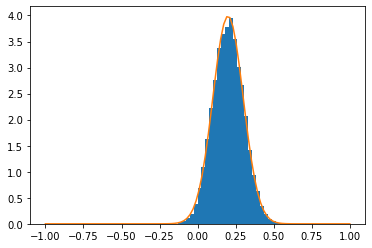

In [56]:
plt.hist(x,density=True,bins=30)
xs = np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))
plt.show()

In [57]:
# Mostramos nuestra cadena
x

array([0.        , 0.        , 0.        , ..., 0.38236963, 0.38029137,
       0.38029137])

In [58]:
# La media de la cadena 
np.mean(x)

0.20175949617944178

In [59]:
# La desviación estándar de la cadena
np.std(x)

0.10054971280128248

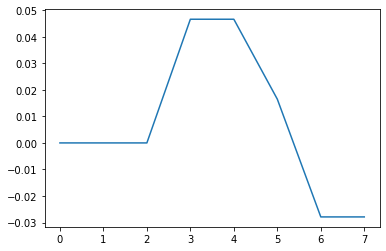

In [71]:
plt.plot(x[:8])

Viéndolo en camara lenta

In [47]:
from scipy.stats import norm

In [48]:
n = 50000
x = np.zeros(n)
x[0]=0

In [51]:
for i in range(5):
    
    xc = np.random.normal(x[i],0.2)
    print(f"Valor Actual = {x[i]}. Valor Propuesto {xc}")
    print(f"Razón de Hasting = {norm.pdf(xc,mu,sigma)/norm.pdf(x[i],mu,sigma)}")
    U = np.random.rand()
    print(f"Número aleatorio: {U}")
    if U < min(1, norm.pdf(xc,mu,sigma)/norm.pdf(x[i],mu,1.2)):
        x[i+1] = xc
    else:
        x[i+1] = x[i]
    print(f"Siguiente valor: {x[i+1]}")
    print()
    print()

Valor Actual = 0.0. Valor Propuesto 0.4530619766387579
Razón de Hasting = 0.30058695443772526
Número aleatorio: 0.5207120769181109
Siguiente valor: 0.0


Valor Actual = 0.0. Valor Propuesto 0.044822403557341045
Razón de Hasting = 2.216646965274274
Número aleatorio: 0.038132922584685924
Siguiente valor: 0.044822403557341045


Valor Actual = 0.044822403557341045. Valor Propuesto -0.08364225741447676
Razón de Hasting = 0.059686931363967355
Número aleatorio: 0.9758946512450188
Siguiente valor: 0.044822403557341045


Valor Actual = 0.044822403557341045. Valor Propuesto 0.3330764450492041
Razón de Hasting = 1.3751149265062925
Número aleatorio: 0.9997342122220237
Siguiente valor: 0.3330764450492041


Valor Actual = 0.3330764450492041. Valor Propuesto 0.4611403052617784
Razón de Hasting = 0.08011870430346525
Número aleatorio: 0.6538582011931874
Siguiente valor: 0.3330764450492041


